In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

C:\Users\B Vasundhara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 18s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

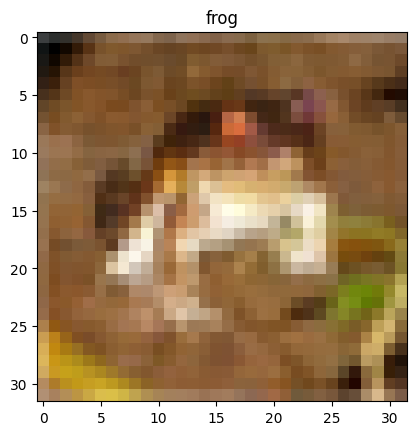

In [5]:
# Plot a sample image (optional)
plt.imshow(X_train[0])
plt.title(class_names[y_train[0][0]])
plt.show()

In [6]:
# Building the CNN model
model = models.Sequential()

In [7]:
# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the results to feed into a Dense layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # 10 output classes for CIFAR-10

In [8]:
# Print the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.5162 - accuracy: 0.4478 - val_loss: 1.2251 - val_accuracy: 0.5537
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1395 - accuracy: 0.5952 - val_loss: 1.0813 - val_accuracy: 0.6159
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9900 - accuracy: 0.6516 - val_loss: 0.9972 - val_accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8949 - accuracy: 0.6863 - val_loss: 0.9907 - val_accuracy: 0.6575
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8233 - accuracy: 0.7100 - val_loss: 0.8745 - val_accuracy: 0.6989
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7688 - accuracy: 0.7337 - val_loss: 0.8637 - val_accuracy: 0.6982
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7181 - accuracy: 0.7488 - val_loss: 0.9108 -

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - loss: 0.8836 - accuracy: 0.7149 - 1s/epoch - 5ms/step

Test accuracy: 0.7149


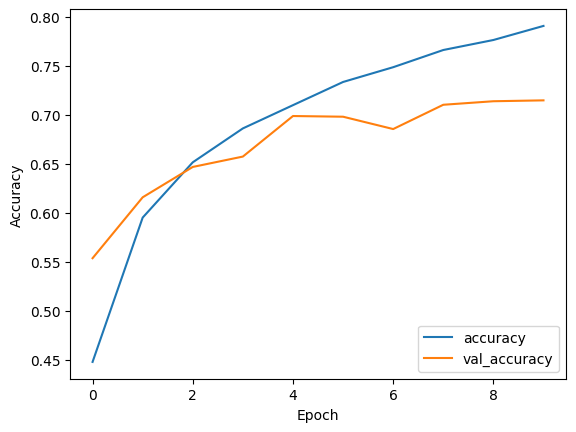

In [12]:
# Plot training and validation accuracy over epochs (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()